# Exercise 1

## Import packages

In [1]:
import skimage.io
import skimage.color
import skimage.exposure
import numpy as np
import matplotlib.pyplot as plt

## Task 1

Implementation of some basic vector and matrix calculations using NumPy.

Reference: https://numpy.org/doc/1.18/reference/index.html

Create the following vectors and matrix using numpy. They should use floating point as data type.
$$
a = \begin{bmatrix}
1 & 0 & 1 & 0 & 1
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
1 & 2 & 3 & 4 & 5
\end{bmatrix}
$$

$$
M =\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
$$

Also define the following scalar value
$$k = 5.0$$

In [10]:
# TODO: Create vectors, matrix and scalar value
a=np.array([1,0,1,0,1], dtype='f')
b=np.array([1,2,3,4,5], dtype=float)
M=np.array([[1,2,3],[4,5,6],[7,8,9]], np.float32)
k=5.0
print(f'a = {a}')
print(f'b = {b}')
print(f'M = {M}')
print(f'k = {k}')

a = [1. 0. 1. 0. 1.]
b = [1. 2. 3. 4. 5.]
M = [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
k = 5.0


In [11]:
# TODO: Add vector a with vector b
add = a+b
np.testing.assert_allclose(add, np.array([2, 2, 4, 4, 6]))
print(f'a + b = {add}')

# TODO: Multiply vector a with scalar value k
mult = a*k
np.testing.assert_allclose(mult, np.array([5, 0, 5, 0, 5]))
print(f'k * a = {mult}')

# TODO: Dot product between a and b
dot = np.dot(a,b)
np.testing.assert_allclose(dot, 9.0)
print(f'<a, b> = {dot}')

# TODO: Create vector c by sclicing vector a in order to get [0, 1, 0]
c = a[1:4]
np.testing.assert_allclose(c, [0, 1, 0])
print(f'c = {c}')

# TODO: Multiply vector c with matrix M
cM_mult = np.multiply(c,M)
np.testing.assert_allclose(cM_mult, [[0, 2, 0], [0, 5, 0], [0, 8, 0]])
print(f'c * M = {cM_mult}')

# TODO: Dot product between vector and matrix M
cM_dot = np.dot(c,M)
np.testing.assert_allclose(cM_dot, [4, 5, 6])
print(f'<c, M> = {cM_dot}')

# TODO: Use a numpy-herlper function to create a vector d = [0, 1, 2 ..., 99]
d = np.arange(0,100)

# TODO: Now use slicing with strides to reduce this vector to d_small = [40, 50, 60]
d_small = d[40:70:10]
np.testing.assert_allclose(d_small, [40, 50, 60])

print(f'd_small = {d_small}')

a + b = [2. 2. 4. 4. 6.]
k * a = [5. 0. 5. 0. 5.]
<a, b> = 9.0
c = [0. 1. 0.]
c * M = [[0. 2. 0.]
 [0. 5. 0.]
 [0. 8. 0.]]
<c, M> = [4. 5. 6.]
d_small = [40 50 60]


## Task 2

1. Load the image in ```./data/pepo.jpg``` from your disk and store it in a variable named ```image``` (use ```skimage.io```).
2. Store and print the shape of the image and the value range (min and max values).
3. Convert it to gray scale and save it in a variable named ```image_gray``` (use ```skimage.color```).
4. Store and print the shape of the grayscale image and the value range (min and max values).
5. Save the grayscale image back to disk in ```./data/pepo_gray.jpg``` (use ```skimage.io```).
6. Use Matplotlib to show the RGB and the grayscale image side by side.

Reference: https://scikit-image.org/docs/stable/index.html  
Reference: https://matplotlib.org/users/index.html  

In [12]:
# TODO: 1. Load the image in ./data/pepo.jpg from your disk and store it in a variable named image
image = skimage.io.imread("./data/pepo.jpg")

# TODO: 2. Store and print the shape of the image and the value range (min and max values)
rgb_image_shape=image.shape
rgb_min=np.min(image)
rgb_max=np.max(image)
print(f'RGB image shape: {rgb_image_shape}')
print(f'RGB image min: {rgb_min}')
print(f'RGB image max: {rgb_max}')

# TODO: 3. Convert it to gray scale and save it in a variable named image_gray
image_gray = skimage.color.rgb2gray(image)

# TODO: 4. Store and print the shape of the grayscale image and the value range (min and max values)
grayscale_image_shape=image_gray.shape
grayscale_min=np.min(image_gray)
grayscale_max=np.max(image_gray)
print(f'Grayscale image shape: {grayscale_image_shape}')
print(f'Grayscale image min: {grayscale_min}')
print(f'Grayscale image max: {grayscale_max}')

# TODO: 5. Save the grayscale image back to disk in ./data/pepo_gray.jpg
image_gray_ubyte = skimage.img_as_ubyte(image_gray)
skimage.io.imsave("./data/pepo_gray.jpg",image_gray_ubyte)

RGB image shape: (512, 512, 3)
RGB image min: 0
RGB image max: 255
Grayscale image shape: (512, 512)
Grayscale image min: 0.0008333333333333333
Grayscale image max: 1.0


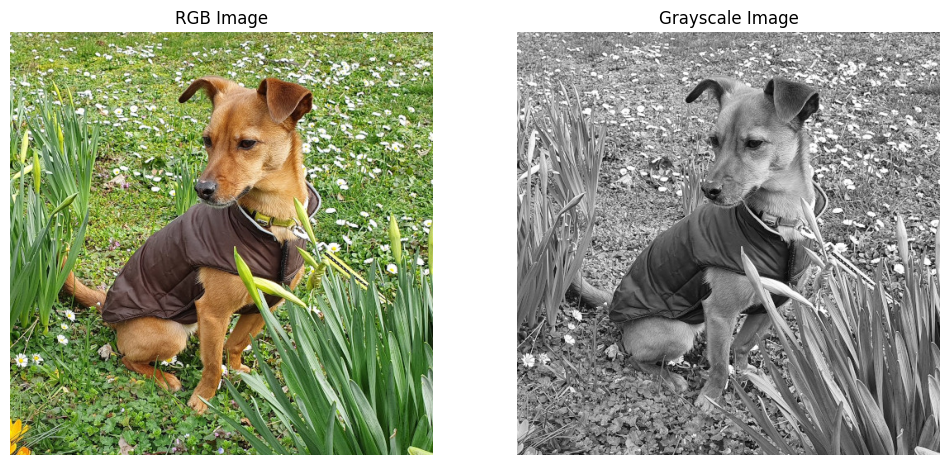

In [13]:
# TODO: 6. Use Matplotlib to show the RGB and the grayscale image side by side.
# Make sure that the gray image is displayed in gray.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title('RGB Image')
axes[0].axis('off')
axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')
plt.show()

## Task 3

Plot the color histogram of the rgb image.

Reference: https://matplotlib.org/users/index.html

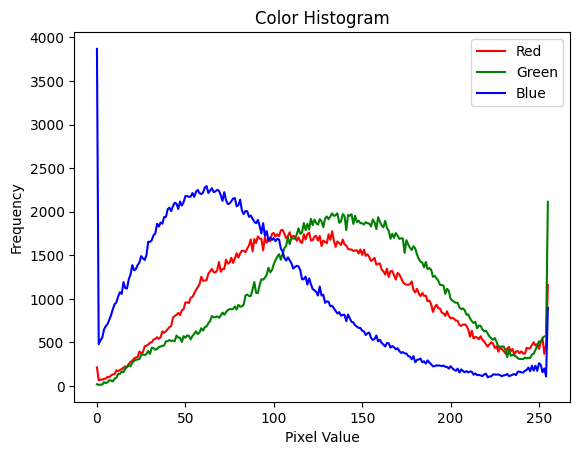

In [14]:
def plot_color_histogram(image):
    '''
    Plot the histogram of each color channel into a single plot.
    Take a look at the scikit-image submodule skimage.exposure

    image -- RGB image
    '''
    hist_red, _ = skimage.exposure.histogram(image[:, :, 0])
    hist_green, _ = skimage.exposure.histogram(image[:, :, 1])
    hist_blue, _ = skimage.exposure.histogram(image[:, :, 2])
    plt.plot(hist_red, color='red', label='Red')
    plt.plot(hist_green, color='green', label='Green')
    plt.plot(hist_blue, color='blue', label='Blue')
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


plot_color_histogram(image)

## Task 4

Convert the RGB image into the HSV color space. Rotate the colors in the HSV color space, convert it back to the RGB color space and plot it together with its histogram. For this task, you are only allowed to use NumPy.

More information about the HSV color space: https://en.wikipedia.org/wiki/HSL_and_HSV

In [15]:
def rgb2hsv(image):
    '''
    Convert the rgb image into hsv color space and return it.

    image -- rgb image
    '''
    image = image/255
    arr = np.array(image,dtype='f')
    out = np.empty_like(arr)
    out_v = arr.max(-1) # Calculate the value (V) channel by taking the maximum of R, G, B channels
    delta = np.ptp(arr, axis=-1) # Calculate the delta (max-min) for each pixel
    out_s = delta / out_v # Calculate the saturation (S) channel
    out_s[delta == 0.0] = 0.0 # Set saturation to 0 where delta is 0
    
    # Calculate the hue (H) channel
    # When red is the highest component, the hue calculation starts from 0 degrees (red angle),
    # where hue is calculated as ((G - B) / Δ) % 6, ensuring correct wrap-around within the range of 0 to 6. 
    idx = arr[..., 0] == out_v
    out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
    #For green dominance, hue starts from 120 degrees, calculated as ((B - R) / Δ) + 2, shifting the hue range by 2.
    idx = arr[..., 1] == out_v
    out[idx, 0] = 2.0 + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
    #When blue dominates, hue begins at 240 degrees, calculated as ((R - G) / Δ) + 4, shifting the hue range by 4.
    idx = arr[..., 2] == out_v
    out[idx, 0] = 4.0 + (arr[idx, 0] - arr[idx, 1]) / delta[idx]
    out_h = (out[..., 0] / 6.0) % 1.0 #Hue values are normalized to the range [0, 1] by dividing by 6.0 and taking the modulus 1.0
    out_h[delta == 0.0] = 0.0 # Set hue to 0 where delta is 0
    
    #These formulas ensure that the resulting hue correctly represents the color's position on the color wheel,
    #with red at 0 degrees, green at 120 degrees, and blue at 240 degrees
    
    
    out[..., 0] = out_h # Hue
    out[..., 1] = out_s # Saturation
    out[..., 2] = out_v # Value
    out[np.isnan(out)] = 0

    hsv=out
    return hsv

def hsv2rgb(image):
    '''
    Convert the hsv image into rgb color space and return it.

    image -- rgb image
    '''
    # TODO: implement function
    arr = np.array(image,dtype='f')
    # Calculate the hue values (hi) by multiplying the red channel by 6 and taking the floor to find the color segment
    hi = np.floor(arr[..., 0] * 6)
    f = arr[..., 0] * 6 - hi # Calculate the fractional part of the hue values
    # Calculate intermediate values for the conversion
    p = arr[..., 2] * (1 - arr[..., 1])
    q = arr[..., 2] * (1 - f * arr[..., 1])
    t = arr[..., 2] * (1 - (1 - f) * arr[..., 1])
    v = arr[..., 2]
    # Stack the hue values along the color dimension and convert to uint8
    hi = np.stack([hi, hi, hi], axis=-1).astype(np.uint8) % 6
    # Choose the appropriate RGB values based on the hue segment
    out = np.choose(
        hi,
        np.stack(
            [
                np.stack((v, t, p), axis=-1),
                np.stack((q, v, p), axis=-1),
                np.stack((p, v, t), axis=-1),
                np.stack((p, q, v), axis=-1),
                np.stack((t, p, v), axis=-1),
                np.stack((v, p, q), axis=-1),
            ]
        ),
    )

    rgb=out

    return (rgb*255).astype(np.uint8)

C:\Users\User\AppData\Local\Temp\ipykernel_7396\249058984.py:19: RuntimeWarning: invalid value encountered in divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
C:\Users\User\AppData\Local\Temp\ipykernel_7396\249058984.py:22: RuntimeWarning: invalid value encountered in divide
  out[idx, 0] = 2.0 + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
C:\Users\User\AppData\Local\Temp\ipykernel_7396\249058984.py:25: RuntimeWarning: invalid value encountered in divide
  out[idx, 0] = 4.0 + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


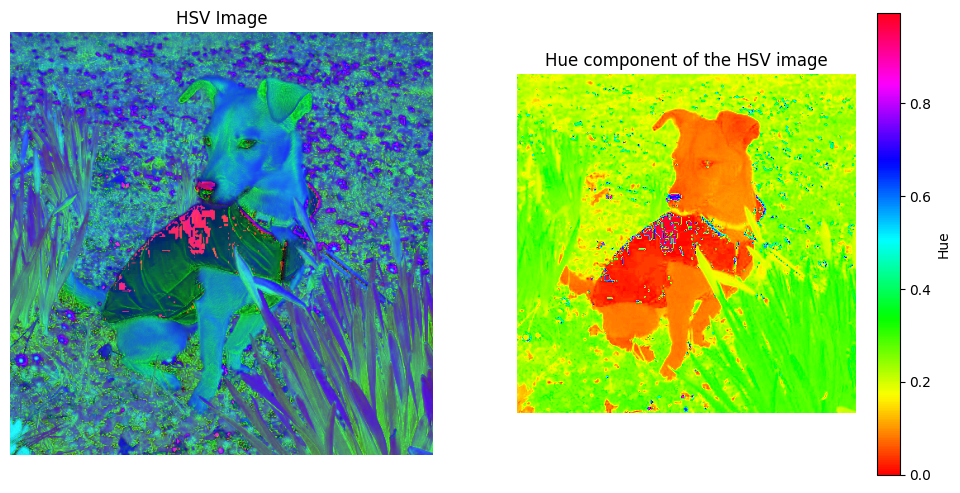

In [16]:
# Change the color space from rgb to hsv and plot it
image_hsv = rgb2hsv(image)

# TODO: plot image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_hsv)
axes[0].set_title('HSV Image')
axes[0].axis('off')
hue_plot=axes[1].imshow(image_hsv[:, :, 0], cmap='hsv')
axes[1].set_title('Hue component of the HSV image')
axes[1].axis('off')
cbar = fig.colorbar(hue_plot, ax=axes[1], orientation='vertical')
cbar.set_label('Hue')
plt.show()